In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import seaborn as sns
from math import factorial
sns.set()

# Step 1 

Approximating a 5D function with a 2nd order Taylor approximation and finding the solution according to

$$x = \dfrac{\nabla^2f(\bar{x})\bar{x}-\nabla f (\bar{x})}{\nabla^2f(\bar{x})}$$

In [3]:
# helper functions
def f(x,w):
    # our polynomial function evaluated at x with weights w
    y = 0
    for i in range(len(w)):
        y += w[i]*x**i
    return y

def f_approx(tt, grads, eval_point):
    y = np.zeros_like(tt)
    for n, term in enumerate(grads):
        n_approx = 1/factorial(n) * term * (tt - eval_point)**n
        y += np.float32(n_approx)
    return y


Solution at=-2.25


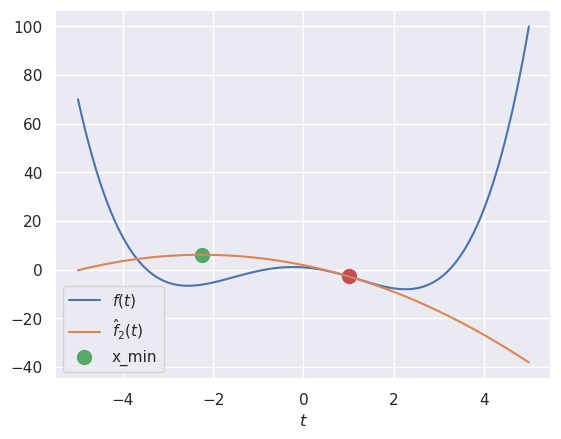

In [4]:
# generate random function to approximate
d = 5
w = np.random.randn(d)
w = np.array([ 0.91565421, -1.28753014, -2.84570267,  0.17129933,  0.24827506])
x = sym.symbols('x')

tt = np.linspace(-5.0, 5.0, 1000)

# the point at which to approximate
point = 1.0

def f(x,w):
    # our polynomial function evaluated at x with weights w
    y = 0
    for i in range(len(w)):
        y += w[i]*x**i
    return y

# plot the original function and approximation point
plt.plot(tt, f(tt, w), label="$f(t)$")
plt.scatter(point, f(point, w), s=100, c='r')

# now do the taylor approximations and plot
order = 2
grads = []
for i in range(0, order+1):
    grads.append(sym.diff(f(x,w), x, i).subs(x, point))

min_x = (grads[2]*point - grads[1])/grads[2]
print("Solution at={:.2f}".format(min_x))

plt.plot(tt, f_approx(tt, grads, point), label="$\hat{f}_"+str(order)+"(t)$")
plt.scatter(min_x, f_approx(min_x, grads, point), s=100, c='g', label="x_min")
plt.xlabel("$t$")
plt.legend()


# Step 2
Try to solve a problem by iteratively applying taylor approximation and solving the equation

<IPython.core.display.Javascript object>


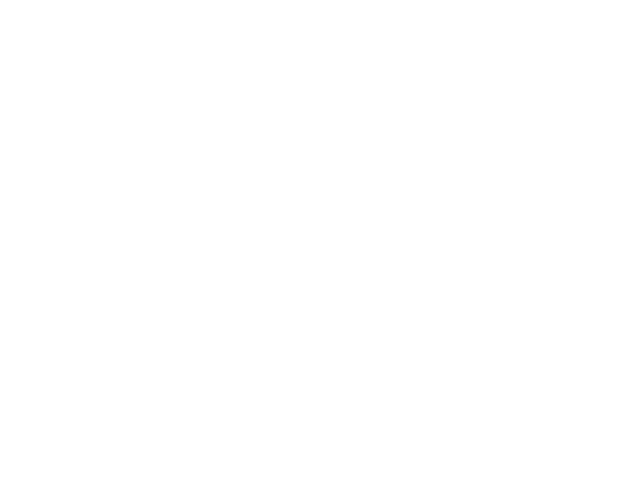

Iteration 0
x= 0.25
Solution at x=0.4538
1.0
Iteration 1
x= -0.123463761647281
Solution at x=-0.0324
0.6830134553650705
Converged in 2 iterations


In [4]:
%matplotlib notebook
# generate random function to approximate
d = 7
w = np.random.randn(d)
# w = np.array([ 0.91565421, -1.28753014, -2.84570267,  0.17129933,  0.24827506])
# w = np.array([-0.99053633, -0.56629773,  0.09965137, -0.50347565, -1.55066343])
# w = np.array([ 1.2776649 , -0.59157139,  0.54709738, -0.20219265, -0.2176812 ])
w = np.array([ 0.11567463,  1.17929718,  0.06751848,  2.06074792,  1.75534084,
       -0.24896415,  0.97157095])
x = sym.symbols('x')

tt = np.linspace(-2.3, 2.1, 1000)

def f(x,w):
    # our polynomial function evaluated at x with weights w
    y = 0
    for i in range(len(w)):
        y += w[i]*x**i
    return y

# start at a point far away from the solution
x_sol = 0.25
last_x_sol = -5.0
tol = 1e-5
x_hist = [x_sol]
x_no_bt_hist = [x_sol]

# plot the original function and initial point
plt.plot(tt, f(tt, w), linewidth=3, label="$f(t)$")
plt.scatter(x_sol, f(x_sol, w), s=100, c='r', label='$x_0$')


k = 0
alphas = 1.1 ** (-np.arange(10) ** 2)
while np.abs(x_sol-last_x_sol) >= tol:
    print("Iteration", k)
    print("x=",x_sol)
    print("Solution at x={:.4f}".format(f(x_sol, w)))

    # now do the taylor approximations and plot
    order = 2
    grads = []
    for i in range(0, order+1):
        grads.append(sym.diff(f(x,w), x, i).subs(x, x_sol))

    last_x_sol = x_sol
    # ensure 2nd grad is always positive
    grads[2] = abs(grads[2])
    
    x_no_bt = (grads[2]*x_sol - grads[1])/grads[2]
    x_no_bt_hist.append(x_no_bt)
    
    for alpha in alphas:
        x_sol_new = (grads[2]*x_sol - alpha*grads[1])/grads[2]
        if f(x_sol_new, w) < f(x_sol, w):
            # accept
            x_sol = x_sol_new
            print(alpha)
            break
        if alpha == alphas[-1]:
            print("ERROR: LAST ALPHA")
    x_hist.append(x_sol)
    k += 1
    plt.plot(tt, f_approx(tt, grads, last_x_sol), label="$\hat{f}_"+str(k)+"(t)$")
    if k>1:
        break

print("Converged in {:} iterations".format(i))
plt.plot(x_hist, f(np.array(x_hist), w), '-*', label='solutions with bt')
plt.plot(x_no_bt_hist, f(np.array(x_no_bt_hist), w), '-*', label='solutions wo bt')

plt.xlabel("$t$")
plt.legend()
plt.tight_layout()
plt.ylim((-5,10))
# plt.axis('equal')

plt.savefig("backtracking_example.png")


Now let's solve a 2D problem

Iteration 0
x= [-3. -3.]
Solution at=[-2.78258866 -2.37466781]
Iteration 1
x= [-2.78258866 -2.37466781]
Solution at=[-2.59016983 -1.88984761]
Iteration 2
x= [-2.59016983 -1.88984761]
Solution at=[-2.4276683  -1.54915491]
Iteration 3
x= [-2.4276683  -1.54915491]
Solution at=[-2.31365267 -1.3504949 ]
Iteration 4
x= [-2.31365267 -1.3504949 ]
Solution at=[-2.26275433 -1.27456711]
Iteration 5
x= [-2.26275433 -1.27456711]
Solution at=[-2.25426136 -1.26339856]
Iteration 6
x= [-2.25426136 -1.26339856]
Solution at=[-2.25405952 -1.26316182]
Converged in 7 iterations


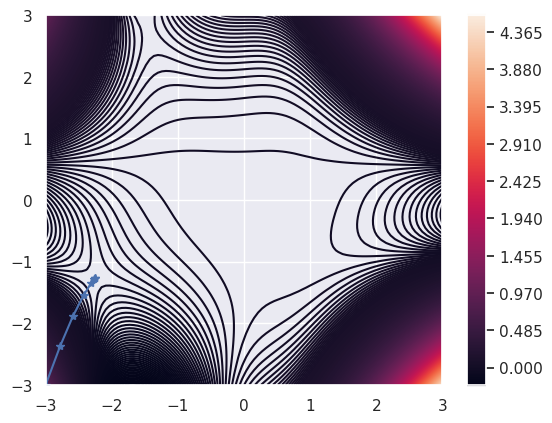

In [8]:
%matplotlib inline
import math
from itertools import product
from sympy import lambdify, derive_by_array
# generate random function to approximate
d = 5
n = 2
num_of_coeffs = 25 #math.comb(n+d, d)-1 TODO needs to be fixed
w = np.random.randn(num_of_coeffs)
w = np.array([-0.94031798,  0.10442504, -0.0672899 ,  1.33458843,  0.65182471,
        0.77838461, -0.51272692, -0.06827795, -1.22360825,  0.42469653,
       -1.0666806 ,  1.89922194, -1.65540502,  0.82853957, -0.18120702,
        0.01004135, -0.33520699,  0.45899176,  0.23145576,  0.70820285,
       -0.66241519,  0.5062736 ,  1.20572769, -0.15434303,  0.32072924])/1000
x = sym.symbols('x:2')

def f(x,w):
    # our polynomial function evaluated at x with weights w
    y = 0
    for i, (x1p, x2p) in enumerate(product(range(d), range(d))):
        y += w[i]*x[0]**x1p*x[1]**x2p
    return y

tt = np.linspace(-3.0, 3.0, 100)

# start at a point far away from the solution
x_sol = np.array([-3., -3.])
last_x_sol = np.array([-4.5, -4.5])
tol = 1e-3
x_hist = [x_sol]

# plot the the level sets
X1, X2 = np.meshgrid(tt, tt)
fx = np.zeros_like(X1)
for i in range(len(tt)):
    for j in range(len(tt)):
        fx[i,j] = f(np.array([X1[i,j],X2[i,j]]), w)

CS=plt.contour(X1, X2, fx, levels=1000)
plt.colorbar()

i = 0
while np.linalg.norm(x_sol-last_x_sol) >= tol:
    print("Iteration", i)
    print("x=",x_sol)

    # now do the taylor approximations and plot
    grads = [lambdify(x, f(x,w))(x_sol[0], x_sol[1]),
            lambdify(x, derive_by_array(f(x,w), x))(x_sol[0], x_sol[1]),
            lambdify(x, derive_by_array(derive_by_array(f(x,w), x), x))(x_sol[0], x_sol[1])]

    last_x_sol = x_sol
    x_sol = np.linalg.inv(grads[2])@(grads[2]@x_sol - grads[1])
    x_hist.append(x_sol)
    print("Solution at={}".format(x_sol))
    i += 1

print("Converged in {:} iterations".format(i))
h = np.array(x_hist).T
plt.plot(h[0], h[1], '-*', label='solutions')


# Step 3: Approximate Q

$$
\begin{align} \label{eq:ddp-q}
    Q(x, u) \approx
    \begin{bmatrix}
        \nabla_x Q(\bar{x}, \bar{u})\\
        \nabla_u Q(\bar{x}, \bar{u})
    \end{bmatrix}^T
    \begin{bmatrix}
        \delta x \\
        \delta u
    \end{bmatrix} +
    \dfrac{1}{2} \begin{bmatrix}
        \delta x \\
        \delta u
    \end{bmatrix}^T
    \begin{bmatrix}
        \nabla_{xx}^2 Q(\bar{x}, \bar{u}) & \nabla_{xu}^2 Q(\bar{x}, \bar{u})\\
        \nabla_{ux}^2 Q(\bar{x}, \bar{u}) & \nabla_{uu}^2 Q(\bar{x}, \bar{u})
    \end{bmatrix}
    \begin{bmatrix}
        \delta x \\
        \delta u
    \end{bmatrix}
\end{align}
$$

Let's try to solve it quickly for the inverted pendulum

State
$$
\textbf{x} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}
$$

Dynamics

$$
\dot{\textbf{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\dfrac{-3g}{2L} \sin(\theta + \pi) + \dfrac{3}{mL^2}u \\ 
\end{bmatrix}
$$



In [9]:
x = sym.symbols('x:3')
sym.Matrix([x[i] for i in range(len(x))])

Matrix([
[x0],
[x1],
[x2]])

In [10]:
u = sym.symbols("u:1")
sym.Matrix([u[i] for i in range(len(u))])

Matrix([[u0]])

In [15]:
x = sym.symbols('x:3')
x = sym.Matrix([x[0], x[1], x[2]])
u = sym.Matrix([sym.symbols('u')])
dt = 0.05 # seconds
G = 9.80665
M = 1.0
L = 1.0

# dynamics
def f(x, u, constrain=True):
    theta = sym.atan2(x[0], x[1])
    theta_dot = x[2]
    torque = sym.tanh(u[0]) if constrain else u[0]
    theta_dot_dot = -3*G*sym.sin(theta + sym.pi)/(2*L) + 3*torque/(M*L**2)
    theta += theta_dot * dt
    theta_dot += theta_dot_dot * dt
    return sym.Matrix([sym.sin(theta), sym.cos(theta), theta_dot])

# instantenious cost
def g(x,u, x_goal, constr_coeff=0.1, eps=1e-4):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Q = np.array([[L**2, L, 0.0], [L, L**2, 0.0], [0.0, 0.0, 0.1]])
    R = np.array([[0.3]])
    result = error.T @ Q @ error + u.T @ R @u
    return result

# termination cost
x_goal = np.zeros(3) # just a placeholder
def h(x, x_goal):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Qt = 100* np.eye(3)
    result = error.T @ Qt @ error
    return result

compute_tot_cost = lambda X, U: np.sum([g(X[i], U[i], x_goal) for i in range(len(U))] + [h(X[-1], x_goal)])

In [105]:
f(x,u)

Matrix([
[                         sin(0.05*x2 + atan2(x0, x1))],
[                         cos(0.05*x2 + atan2(x0, x1))],
[0.73549875*x0/sqrt(x0**2 + x1**2) + x2 + 0.15*tanh(u)]])

In [106]:
goal = np.array([0.0, 0.0, 0.0])
g(x, u, goal)

Matrix([[0.3*u**2 + x0*(1.0*x0 + 1.0*x1) + x1*(1.0*x0 + 1.0*x1) + 0.1*x2**2]])

In [107]:
h(x, goal)

Matrix([[100.0*x0**2 + 100.0*x1**2 + 100.0*x2**2]])

In [108]:
# dynamics and cost function test
N = 10
np.random.seed(42)
us_init = np.random.uniform(-1, 1, (N, 1))

tot = 0.0
x0 = np.array([np.sin(np.pi), np.cos(np.pi), 0.0])
for i in range(len(us_init)):
    print(x0)
    tot += g(x0, us_init[i], goal)
    x0 = np.array(f(x0, us_init[i]), dtype=np.double).flatten()

print("total cost:", tot)
print("Terminal cost:", h(x0, goal))

[ 1.2246468e-16 -1.0000000e+00  0.0000000e+00]
[ 1.22464680e-16 -1.00000000e+00 -3.68674586e-02]
[ 0.00184337 -0.9999983   0.07068146]
[-0.0016907  -0.99999857  0.13703658]
[-0.00854243 -0.99996351  0.1650124 ]
[-0.01679236 -0.999859    0.06922871]
[-0.0202532  -0.99979488 -0.03262745]
[-0.01862214 -0.99982659 -0.15377379]
[-0.0109343  -0.99994022 -0.073795  ]
[-0.00724471 -0.99997376 -0.05190954]
total cost: 11.255845459775394
Terminal cost: 100.00032894560246


Starting DDP optimization with final state cost 4703.37 and total cost 4916.48
    Accepting new solution with alpha=1.00 and 0 backtracks
Iteration 0 finished in 0.01s
    with final cost 1035.3254 and total cost 1279.3657
    final state -1.55 -2.90
    Accepting new solution with alpha=1.00 and 0 backtracks
Iteration 1 finished in 0.01s
    with final cost 63.5759 and total cost 261.1397
    final state -0.67 -0.45
    Accepting new solution with alpha=1.00 and 0 backtracks
Iteration 2 finished in 0.01s
    with final cost 13.1272 and total cost 208.7899
    final state -0.34 0.12
    Accepting new solution with alpha=0.68 and 2 backtracks
Iteration 3 finished in 0.01s
    with final cost 8.4400 and total cost 196.0125
    final state -0.28 0.07
    Accepting new solution with alpha=1.00 and 0 backtracks
Iteration 4 finished in 0.01s
    with final cost 2.7874 and total cost 189.0524
    final state -0.11 0.12
    Accepting new solution with alpha=1.00 and 0 backtracks
Iteration 5 f

    Accepting new solution with alpha=0.68 and 2 backtracks
Iteration 65 finished in 0.01s
    with final cost 0.0000 and total cost 110.9914
    final state -0.00 0.00
    Accepting new solution with alpha=0.68 and 2 backtracks
Iteration 66 finished in 0.01s
    with final cost 0.0000 and total cost 110.6432
    final state -0.00 0.00
    Accepting new solution with alpha=0.42 and 3 backtracks
Iteration 67 finished in 0.01s
    with final cost 0.0000 and total cost 110.3842
    final state -0.00 0.00
    Accepting new solution with alpha=0.91 and 1 backtracks
Iteration 68 finished in 0.01s
    with final cost 0.0000 and total cost 110.3813
    final state -0.00 0.00
    Accepting new solution with alpha=0.42 and 3 backtracks
Iteration 69 finished in 0.01s
    with final cost 0.0000 and total cost 110.2123
    final state -0.00 0.00
    Accepting new solution with alpha=0.68 and 2 backtracks
Iteration 70 finished in 0.01s
    with final cost 0.0000 and total cost 110.1809
    final sta

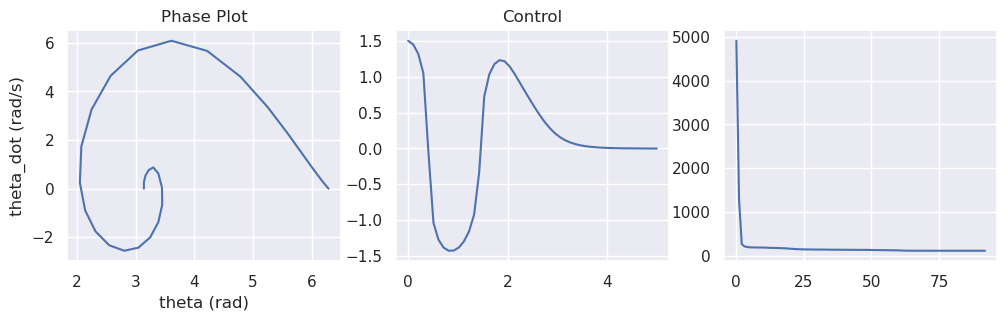

In [189]:
from numpy.linalg import pinv, inv, norm
from time import time
from copy import deepcopy
%matplotlib inline

#########################
# paremeters
N = 50
Nx = 3
Nu = 1
max_iters = 200
x0 = np.array([np.sin(np.pi), np.cos(np.pi), 0.0])
x_goal = np.array([np.sin(0.0), np.cos(0.0), 0.0])
with_hessians = False
constrain = True
#########################

# alphas used for backtracking
alphas = 1.1 ** (-np.arange(10) ** 2)
# tolerance for convergence
tol = 1e-5

# precompute functions and derivatives
f_lambda = lambdify((x,u), f(x,u, constrain))
gx = lambdify((x,u), g(x,u, x_goal).jacobian(x))
gu = lambdify((x,u), g(x,u, x_goal).jacobian(u))
gxx = lambdify((x,u), g(x,u, x_goal).jacobian(x).jacobian(x))
gux = lambdify((x,u), g(x,u, x_goal).jacobian(u).jacobian(x))
guu = lambdify((x,u), g(x,u, x_goal).jacobian(u).jacobian(u))
fx = lambdify((x,u), f(x,u, constrain).jacobian(x))
fu = lambdify((x,u), f(x,u, constrain).jacobian(u))
jac = f(x,u).jacobian(x)
hess = [jac.row(i).jacobian(x) for i in range(Nx)]
fxx = lambdify((x,u), hess)
jac = f(x,u).jacobian(u)
hess = [jac.row(i).jacobian(x) for i in range(Nx)]
fux = lambdify((x,u), hess)
jac = f(x,u).jacobian(u)
hess = [jac.row(i).jacobian(u) for i in range(Nx)]
fuu = lambdify((x,u), hess)

hx = lambdify(x, h(x, x_goal).jacobian(x))
hxx = lambdify(x, h(x, x_goal).jacobian(x).jacobian(x))


# rollout initial controls to get a trajectory
np.random.seed(0)
U = np.random.uniform(-1.0, 1.0, (N, Nu))
X = [deepcopy(x0)]
for i in range(len(U)):
    x0 = f_lambda(x0, U[i]).flatten()
    X.append(deepcopy(x0))
X = np.array(X)

# keep a history of the trajectory
X_hist = [deepcopy(X)]
U_hist = [deepcopy(U)]

# keep a histyory of the costs
total_cost = [compute_tot_cost(X,U)]
final_cost = [h(X[-1], x_goal)]

print("Starting DDP optimization with final state cost {:.2f} and total cost {:.2f}".format(final_cost[-1], total_cost[-1]))

overall_start = time()
done=False

# overall DDP iterations
for i in range(max_iters):
    if len(total_cost) > 1:
        if abs(total_cost[-2] - total_cost[-1]) < tol:
            print("Converged")
            break
    
    loop_start = time()

    Vx = hx(*X[-1]).flatten(); assert Vx.shape == (Nx,)
    Vxx = hxx(*X[-1]); assert Vxx.shape == (Nx, Nx)

    # backwards pass
    Qus = []
    Quus = []
    Quxs = []
    for t in range(N)[::-1]:
#         print("t=",t)
        gx_e = gx(X[t], U[t]).flatten(); assert gx_e.shape == (Nx,)
        gu_e = gu(X[t], U[t]).flatten(); assert gu_e.shape == (Nu,)
        gxx_e = gxx(X[t], U[t]); assert gxx_e.shape == (Nx, Nx)
        gux_e = gux(X[t], U[t]); assert gux_e.shape == (Nu, Nx)
        guu_e = guu(X[t], U[t]); assert guu_e.shape == (Nu, Nu)
        fx_e = fx(X[t], U[t]); assert fx_e.shape == (Nx, Nx)
        fu_e = fu(X[t], U[t]); assert fu_e.shape == (Nx, Nu)
        if with_hessians:
            fxx_e = np.array(fxx(X[t], U[t])); assert fxx_e.shape == (Nx, Nx, Nx)
            fux_e = np.array(fux(X[t], U[t])); assert fux_e.shape == (Nx, Nu, Nx)
            fuu_e = np.array(fuu(X[t], U[t])); assert fuu_e.shape == (Nx, Nu, Nu)
#             print("fxx", fxx_e)
#             print("fux", fux_e)
#             print("fuu", fuu_e)
        
        Qx = gx_e + fx_e.T@Vx; assert Qx.shape == (Nx,)
        Qu = gu_e + fu_e.T@Vx; assert Qu.shape == (Nu,)
        Qxx = gxx_e + fx_e.T@Vxx@fx_e; assert Qxx.shape == (Nx, Nx)
        Quu = guu_e + fu_e.T@Vxx@fu_e; assert Quu.shape == (Nu, Nu)
        Qux = gux_e + fu_e.T@Vxx@fx_e; assert Qux.shape == (Nu, Nx)
        
#         print("before")
#         print("Qxx", Qxx)
#         print("Quu", Quu)
#         print("Qux", Qux)
        
        if with_hessians:
            Qxx += np.tensordot(Vx, fxx_e, axes=1)
            Quu += np.tensordot(Vx, fuu_e, axes=1)
            Qux += np.tensordot(Vx, fux_e, axes=1)
#             print("after")
#             print("Qxx", Qxx)
#             print("Quu", Quu)
#             print("Qux", Qux)
        
        # store for forward pass
        Qus.append(Qu)
        Quus.append(Quu)
        Quxs.append(Qux)
        
        Vx = Qx - Qux.T@inv(Quu)@Qu; assert Vx.shape == (Nx,)
        Vxx = Qxx - Qux.T@inv(Quu)@Qux; assert Vxx.shape == (Nx, Nx)


    # reverse arrays for convinience
    Qus.reverse()
    Quus.reverse()
    Quxs.reverse()

    # forward pass with backtracking
    for k, alpha in enumerate(alphas):
        X_star = np.zeros_like(X)
        U_star = np.zeros_like(U)
        X_star[0] = X[0].copy()
        for t in range(N):
            error = X_star[t] - X[t]
            U_star[t] = U[t] - inv(Quus[t])@(alpha*Qus[t] + Quxs[t]@error)
            X_star[t+1] = f_lambda(X_star[t], U_star[t]).flatten()
    
        # update cost metric to see if we're doing well
        new_tot_cost = compute_tot_cost(X_star, U_star)
        if new_tot_cost < total_cost[-1]:
            print("    Accepting new solution with alpha={:.2f} and {:} backtracks".format(alpha, k))
            X = X_star
            U = U_star
            break

        if alpha == alphas[-1]:
            print("    Error: Reached final alpha")
            done=True
            
    
    X_hist.append(deepcopy(X))
    U_hist.append(deepcopy(U))
    total_cost.append(compute_tot_cost(X, U))
    final_cost.append(h(X[-1], x_goal))
    time_taken = time() - loop_start
    theta=np.arctan2(X[-1][0], X[-1][1])
    print("Iteration {:} finished in {:.2f}s\n    with final cost {:.4f} and total cost {:.4f}\n    final state {:.2f} {:.2f}"\
          .format(i, time_taken, final_cost[-1], total_cost[-1], theta, X[-1][2]))
    if done:
        break
    
overall_time = time() - overall_start
print("Finished in {:.2f}s".format(overall_time))

%matplotlib inline
# Constrain the actions to see what's actually applied to the system
n = -1
X = X_hist[n]
U = U_hist[n]
tt = np.linspace(0, dt*N, N)
theta_sol = np.unwrap(np.arctan2(X[:,0], X[:,1]))
theta_dot_sol = X[:, 2]
cost = np.zeros((len(X), 1))
for i in range(len(X)-1):
    cost[i] = compute_tot_cost(X[i:], U[i:])

fig, ax = plt.subplots(1,3, figsize=(12,3))

ax[0].plot(theta_sol, theta_dot_sol)
ax[0].set_xlabel("theta (rad)")
ax[0].set_ylabel("theta_dot (rad/s)")
ax[0].set_title("Phase Plot")
ax[1].set_title("Control")
ax[1].plot(tt, U)
ax[2].plot(total_cost)

# Making cool plots

<IPython.core.display.Javascript object>


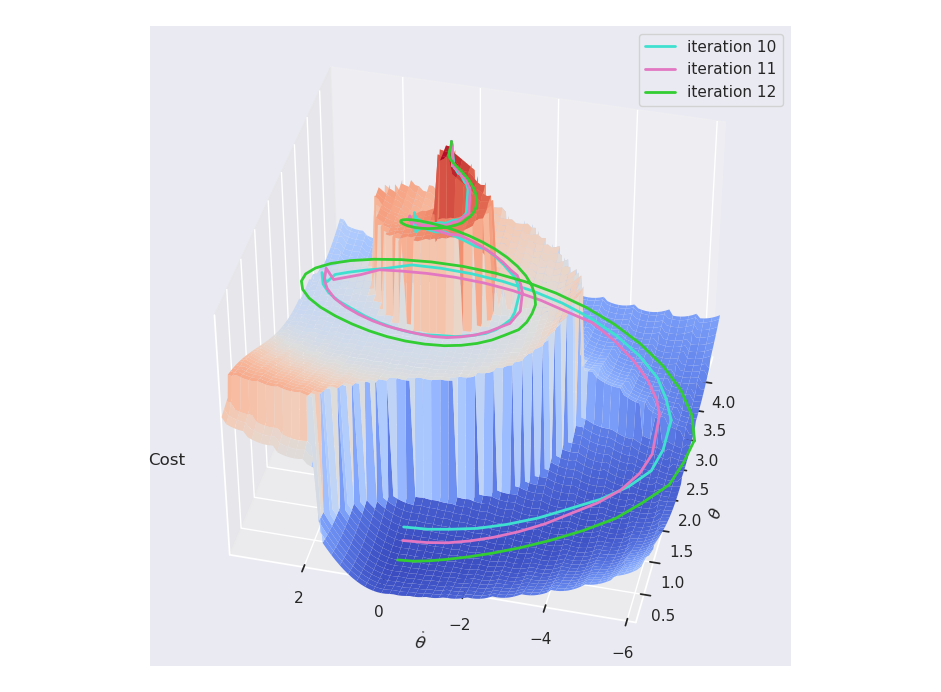

In [53]:
%matplotlib notebook
from matplotlib import cm

X_target = X_hist[12]
U_target = U_hist[12]

sol_cost = np.zeros_like(theta_sol)
for i in range(len(theta_sol)-1):
    sol_cost[i] = compute_tot_cost(X[i:], U[i:])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

n_gridpoints = 100
theta = np.linspace(np.min(theta_sol), np.max(theta_sol), n_gridpoints)
theta_dot = np.linspace(np.min(theta_dot_sol), np.max(theta_dot_sol), n_gridpoints)
XX, YY = np.meshgrid(theta, theta_dot)
grid = np.zeros((len(theta), len(theta_dot)))
for i in range(len(theta)):
    for j in range(len(theta_dot)):
        th = theta[i]
        thd = theta_dot[j]
        xx = np.array([np.sin(th), np.cos(th), thd])
        closest_idx = np.argmin(norm(xx - X_target, axis=1))
        grid[j,i] = 30*norm(xx-X_target[closest_idx])**2 + compute_tot_cost(X_target[closest_idx:], U_target[closest_idx:])
        
for n, c in zip([10, 11, 12], ["turquoise", "tab:pink", "limegreen"]):
    sol_cost_iter = np.zeros_like(theta_sol)
    for i in range(N):
        xx = X_hist[n][i]
        closest_idx = np.argmin(norm(xx - X_target, axis=1))
        sol_cost_iter[i] = 30*norm(xx-X_target[closest_idx])**2 + compute_tot_cost(X_target[closest_idx:], U_target[closest_idx:])
    
    theta_iter = np.unwrap(np.arctan2(X_hist[n][:,0], X_hist[n][:,1]))
    theta_dot_iter = X_hist[n][:, 2]
    sol_cost_iter[-1] = sol_cost_iter[-2]
    ax.plot(theta_iter, theta_dot_iter, sol_cost_iter, linewidth=2, c=c, label="iteration {:}".format(n))

    
theta_alt = np.vstack((np.sin(theta), np.cos(theta), theta_dot)).T
np.argmin(norm(X_hist[2][:-1] - theta_alt, axis=1))
        

surf = ax.plot_surface(XX, YY, grid, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\dot{\theta}$')
ax.set_zlabel("Cost")
ax.get_zaxis().set_ticks([])
ax.legend()
plt.tight_layout()
plt.savefig("dpp_optimizations_low_steps.pdf")

<IPython.core.display.Javascript object>


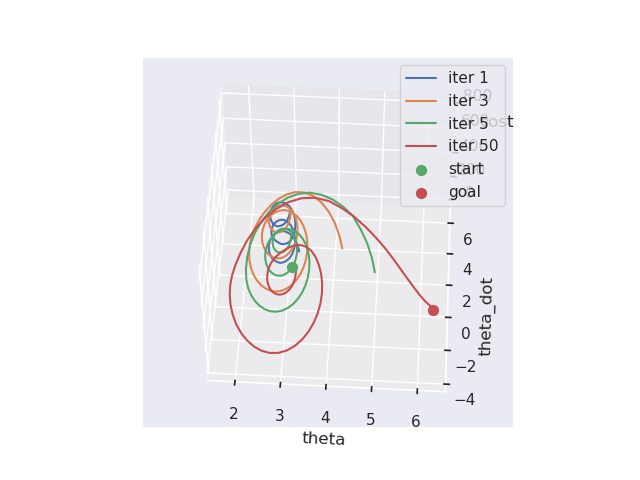

<function matplotlib.pyplot.axis(*args, emit=True, **kwargs)>

In [351]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel("cost")
    
for n in [1, 3, 5, 50]:
    X = X_hist[n]
    U = U_hist[n]
    sol_cost = np.zeros_like(theta_sol)
    for i in range(len(theta_sol)-1):
        sol_cost[i] = compute_tot_cost(X[i:], U[i:])
    
    sol_cost[-1] = sol_cost[-2]
    theta_sol = np.unwrap(np.arctan2(X[:,0], X[:,1]))
    theta_dot_sol = X[:, 2]
    ax.plot(theta_sol, theta_dot_sol, sol_cost, label="iter {:}".format(n))
ax.scatter(np.pi, 0.0, sol_cost[0], c='g', s=50, label="start")
ax.scatter(2*np.pi, 0.0, 0.0, c='r', s=50, label="goal")
plt.legend()

plt.axis

# library implementation

In [6]:
%load_ext autoreload
%autoreload 2
from rl_bench import RLib
from rl_bench.RLib.Policies.DDP import DDP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Inverted pendulum

State
$$
\textbf{x} = \begin{bmatrix} \sin(\theta) \\ \cos(\theta) \\ \dot{\theta} \end{bmatrix}
$$

Controls (torque)
$$
\textbf{u} = \begin{bmatrix} \tau \end{bmatrix}
$$

Dynamics

$$
\dot{\textbf{x}} = 
\begin{bmatrix}
\sin(\dot{\theta}) \\
\cos(\dot{\theta}) \\
\dfrac{-3g}{2L} \sin(\theta + \pi) + \dfrac{3}{mL^2} \tanh(u) \\ 
\end{bmatrix}
$$

Cost functions

$$
g(\textbf{x}, \textbf{u}) = (\textbf{x} - \textbf{x}_g)^T C (\textbf{x} - \textbf{x}_g)
+ \textbf{u}^T R \textbf{u}
$$

$$
h(\textbf{x}_f) = (\textbf{x}_f - \textbf{x}_g)^T C_f (\textbf{x}_f - \textbf{x}_g)
$$

Finished in 2.33s


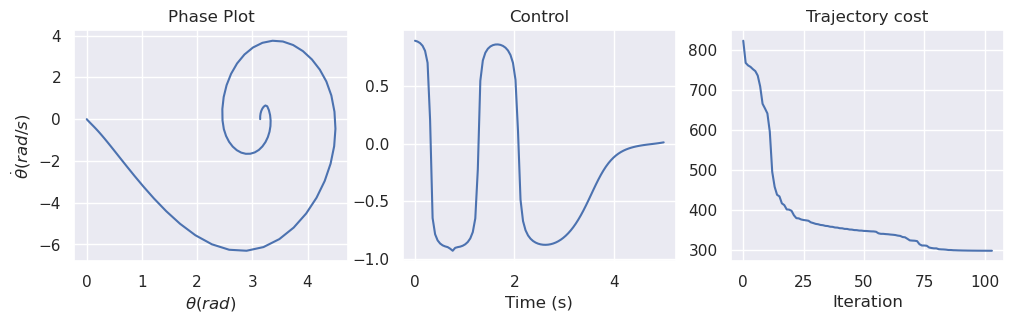

In [24]:
%matplotlib inline
from time import time

x = sym.symbols('x:3')
x = sym.Matrix([x[0], x[1], x[2]])
u = sym.Matrix([sym.symbols('u')])
dt = 0.05 # seconds
G = 9.80665
M = 1.0
L = 1.0

# dynamics
def f(x, u, constrain=True):
    theta = sym.atan2(x[0], x[1])
    theta_dot = x[2]
    torque = sym.tanh(u[0]) if constrain else u[0]
    theta_dot_dot = -3*G*sym.sin(theta + sym.pi)/(2*L) + 3*torque/(M*L**2)
    theta += theta_dot * dt
    theta_dot += theta_dot_dot * dt
    return sym.Matrix([sym.sin(theta), sym.cos(theta), theta_dot])

# instantenious cost
def g(x,u, x_goal, constr_coeff=0.1, eps=1e-4):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Q = np.array([[L**2, L, 0.0], [L, L**2, 0.0], [0.0, 0.0, 0.1]])
    R = np.array([[0.3]])
    result = error.T @ Q @ error + u.T @ R @u
    return result

# termination cost
x_goal = np.zeros(3) # just a placeholder
def h(x, x_goal):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Qt = 100* np.eye(3)
    result = error.T @ Qt @ error
    return result

np.random.seed(42)
N = 100
Nx = 3
Nu = 1
x0 = np.array([np.sin(np.pi), np.cos(np.pi), 0.0])
x_goal = np.array([np.sin(0.0), np.cos(0.0), 0.0])
np.random.seed(42)
ddp = DDP(N, Nx, Nu, f, g, h, x_goal)
start = time()
X, U, J_hist, X_hist, U_hist = ddp.fit(x0, x_goal, full_output=True)
print("Finished in {:.2f}s".format(time()-start))

fig, ax = plt.subplots(1,3, figsize=(12,3))
tt = np.linspace(0, dt*N, N)
theta_sol = np.unwrap(np.arctan2(X[:,0], X[:,1]))
theta_dot_sol = X[:, 2]

ax[0].plot(theta_sol, theta_dot_sol)
ax[0].set_xlabel(r"$\theta (rad)$")
ax[0].set_ylabel(r"$\dot{\theta} (rad/s)$")
ax[0].set_title("Phase Plot")
ax[1].set_title("Control")
ax[1].plot(tt, np.tanh(U))
ax[1].set_xlabel("Time (s)")
ax[2].plot(J_hist)
ax[2].set_title("Trajectory cost")
ax[2].set_xlabel("Iteration")
plt.savefig("ddp_pendulum.pdf")

## Cartpole
State
$$
\textbf{x} =
\begin{bmatrix}
    \sin(\theta) \\
    \cos(\theta) \\
    \dot{\theta} \\
    x \\
    \dot{x}
\end{bmatrix}
$$

Controls (torque)
$$
\textbf{u} = \begin{bmatrix} \tau \end{bmatrix}
$$

Dynamics

$$
\dot{\textbf{x}} = 
\begin{bmatrix}
\sin(\dot{\theta}) \\
\cos(\dot{\theta}) \\
\dfrac{-3g}{2L} \sin(\theta + \pi) + \dfrac{3}{mL^2} \tanh(u) \\ 
\end{bmatrix}
$$

Cost functions

$$
g(\textbf{x}, \textbf{u}) = (\textbf{x} - \textbf{x}_g)^T C (\textbf{x} - \textbf{x}_g)
+ \textbf{u}^T R \textbf{u}
$$

$$
h(\textbf{x}_f) = (\textbf{x}_f - \textbf{x}_g)^T C_f (\textbf{x}_f - \textbf{x}_g)
$$

Finished in 0.92s


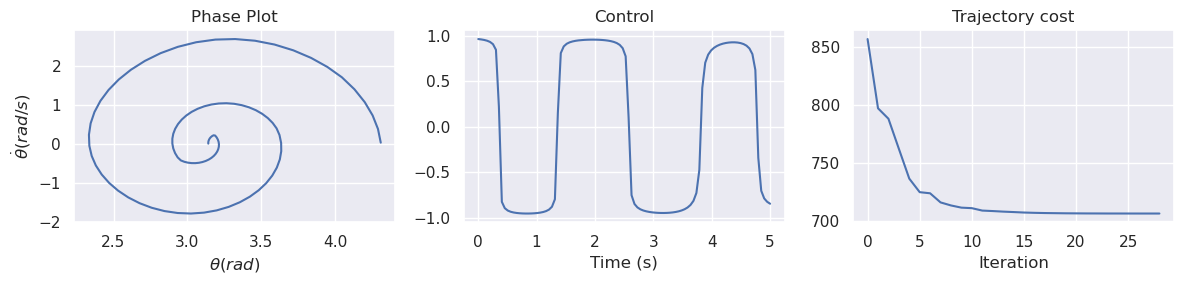

In [47]:
mp = 0.1
mc = 1.0
l = 1.0
G = 9.80665
dt = 0.05
N = 100
Nx = 5
Nu = 1

x = sym.symbols('x:{:}'.format(Nx))
x = sym.Matrix([xi for xi in x])
u = sym.Matrix([sym.symbols('u')])

def f(x, u, constrain=True):

    x_ = x[0]
    x_dot = x[1]
    sin_theta = x[2]
    cos_theta = x[3]
    theta_dot = x[4]
    F = sym.tanh(u[0]) if constrain else u[0]

    # Define dynamics model as per Razvan V. Florian's
    # "Correct equations for the dynamics of the cart-pole system".
    # Friction is neglected.

    # Eq. (23)
    temp = (F + mp * l * theta_dot**2 * sin_theta) / (mc + mp)
    numerator = G * sin_theta - cos_theta * temp
    denominator = l * (4.0 / 3.0 - mp * cos_theta**2 / (mc + mp))
    theta_dot_dot = numerator / denominator

    # Eq. (24)
    x_dot_dot = temp - mp * l * theta_dot_dot * cos_theta / (mc + mp)

    # Deaugment state for dynamics.
    theta = sym.atan2(sin_theta, cos_theta)
    next_theta = theta + theta_dot * dt
    
    return sym.Matrix([x_ + x_dot * dt,
                       x_dot + x_dot_dot * dt,
                       sym.sin(next_theta),
                       sym.cos(next_theta),
                       theta_dot + theta_dot_dot * dt])


def g(x, u, x_goal):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Q = np.eye(len(x))
    Q[1, 1] = Q[4, 4] = 0.0
    R = 0.1*np.eye(len(u))
    return error.T@Q@error + u.T@R@u

def h(x, x_goal):
    if type(x) == np.ndarray:
        error = x-x_goal
    else:
        error = x-x_goal.reshape((-1, 1))
    Q = 100*np.eye(len(x))
    return error.T@Q@error



x0 = np.array([0.0, 0.0, np.sin(np.pi), np.cos(np.pi), 0.0])
x_goal = np.array([0.0, 0.0, np.sin(0.0), np.cos(0.0), 0.0])
np.random.seed(42)
ddp = DDP(N, Nx, Nu, f, g, h, x_goal)
start = time()
X, U, J_hist, X_hist, U_hist = ddp.fit(x0, x_goal, full_output=True)
print("Finished in {:.2f}s".format(time()-start))

fig, ax = plt.subplots(1,3, figsize=(12,3))
tt = np.linspace(0, dt*N, N)
theta_sol = np.unwrap(np.arctan2(X[:,2], X[:,3]))
theta_dot_sol = X[:, 4]

ax[0].plot(theta_sol, theta_dot_sol)
ax[0].set_xlabel(r"$\theta (rad)$")
ax[0].set_ylabel(r"$\dot{\theta} (rad/s)$")
ax[0].set_title("Phase Plot")
ax[1].set_title("Control")
ax[1].plot(tt, np.tanh(U))
ax[1].set_xlabel("Time (s)")
ax[2].plot(J_hist)
ax[2].set_title("Trajectory cost")
ax[2].set_xlabel("Iteration")
plt.tight_layout()
plt.savefig("ddp_cartpole.pdf")